<a href="https://colab.research.google.com/github/pondbaahh/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'วัชราภรณ์ นามมุงคุณ'
ID = '6230205357'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:19


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.701053,-6.716733,0.403364,8.234690,-8.066837,-2.969272,-1.286681,-2.798265,-9.434770,-6.585169,7.514024,-5.458482,-9.662730,0.537632,1.835089,-3.167337,9.810909,-6.315188,9.017869,-2.029059,5.476176,0.715766,-7.416330,-7.806251,9.232618,8.409526,6.286528,-2.080765,-1.946039,5.766268,-13.433466,30.831342
1,4.841694,9.280394,5.654291,-3.599408,-5.216423,-4.875522,11.564998,2.582919,7.268002,-9.161972,6.814420,-10.976289,-9.452713,-8.650234,-5.160244,-2.122332,11.510111,10.001235,1.100650,4.305707,-8.897800,5.286709,-8.570399,-4.133147,8.891458,-3.532263,6.349222,-0.239454,3.451313,4.345222,18.560788,23.726110
2,-0.188645,2.192432,-3.740707,-4.352023,6.094169,-9.596532,-4.308490,-6.889333,-5.077756,1.258608,-6.810207,-2.277972,2.577195,-2.932891,-2.938483,1.938843,6.440925,-2.161827,-10.726694,8.769474,6.872000,-4.019564,4.486527,-1.790280,3.444224,-7.158424,-7.046810,7.500269,8.608146,-6.347430,4.384863,-29.737152
3,1.070325,-4.596020,-6.293644,11.475116,-2.808209,1.518051,-7.053902,4.258510,3.218390,4.061030,6.367516,6.645035,-1.217043,8.827455,-11.346177,5.971061,6.831416,1.345803,3.357612,7.763393,-1.969457,-1.002429,-1.091993,4.763577,-10.140268,-7.034817,-7.012771,7.431734,-6.320076,3.040692,-9.192040,17.203462
4,-6.795409,-3.422134,-7.935199,5.704634,6.601110,-10.263675,9.217757,6.769842,4.182693,3.637057,-7.968196,-1.315642,9.280129,-2.030549,-8.638449,-5.767849,0.435129,-8.158601,2.004322,-8.079486,-2.890066,-7.521663,3.418707,-4.440289,3.099145,3.605520,-1.421144,-10.701892,10.955527,2.214531,-6.844268,13.072654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.228056,6.839652,5.688027,5.059781,-9.822777,8.527898,9.581539,-5.941708,4.019455,-1.991152,-1.039847,3.131037,8.287049,6.791250,8.476287,3.919213,-7.350831,6.703071,-4.241985,0.331566,8.358831,-0.458548,7.436097,9.914771,8.944351,-4.316166,-5.774025,-7.241011,-0.100094,7.654443,13.679304,40.272216
9996,3.874110,-3.381571,-5.827415,10.433695,2.009930,4.842115,-6.144390,4.278543,3.174105,6.071067,8.091267,6.234274,-1.376929,8.841083,-8.938951,6.276817,6.379705,0.849872,3.258522,10.383427,-2.332721,-0.398124,0.094108,4.194007,-8.157674,-7.813417,-6.653850,5.263005,-2.912163,1.642549,-6.763143,10.212746
9997,2.723442,-8.816045,7.226316,9.642599,-3.002382,1.185427,-0.529747,6.702167,-7.207471,10.747197,7.174096,0.069767,2.317635,6.258422,-0.432146,-3.708092,-7.267421,2.333919,2.544128,0.902972,7.557652,-5.001459,-4.342318,-3.762169,-4.423610,4.586694,-7.123318,2.317072,5.545957,-10.469733,-17.632089,-50.348664
9998,-6.870815,-2.104393,-8.007465,9.810235,7.760187,-8.250139,8.150071,7.945936,6.862951,4.200982,-7.341678,-2.715077,11.188661,-2.081114,-7.773971,-7.525738,-2.642424,-10.417773,4.039373,-7.889138,-1.538853,-6.396142,4.206817,-5.607508,3.995322,3.321244,-5.785854,-9.029805,10.328162,2.925788,-4.208785,16.628938


2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ 

ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [6]:
Data.shape #มี Data 10000 ตัว และมี 32 dimensions 

(10000, 32)

### clustering



In [7]:
from sklearn.cluster import KMeans

Define

In [8]:
kmeans = KMeans(n_clusters=3,random_state=2021) 
#random_state กำหนดให้ค่า random ทุกคนเหมือนกัน  k= 3

Fit-transform

คำนวณหาจุด cluter centers ของข้อมูลData ด้วยวิธี K-means clustering





In [9]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_ 
#จุดศูนย์กลางของทั้งหมด 3 กลุ่ม เพราะ K = 3  และมี 32 dimensions
 #จุดเซนทรอยด์

array([[ -1.08780549,  -2.29607055,  -0.98298195,   0.14346779,
          0.5527234 ,   0.07089763,  -1.70616748,  -1.73697949,
         -3.58114554,   4.34622829,   0.79279007,   1.93817897,
          3.79825024,   3.8128724 ,  -1.20532033,   2.60390476,
          3.16344582,   2.07233784,  -5.92159968,   1.22279113,
         -0.44676379,  -1.13328253,  -1.31608209,   0.50623549,
         -1.43159518,  -1.17396953,  -0.59336161,  -1.99722839,
          1.55145501,  -7.41109493,  -4.59214109, -35.05547467],
       [  1.27481937,   2.71835787,  -2.1760495 ,   1.51074048,
          1.34231573,  -1.63041974,   2.69802951,   2.10630659,
          3.99868411,  -2.29097958,   0.67783007,  -0.42214799,
         -1.31571444,  -1.15031994,  -3.9202539 ,  -0.43477137,
         -0.07970473,   1.7704335 ,   1.49111206,  -1.84092775,
          1.06085039,  -0.99374174,  -0.44939261,  -2.28596322,
          3.93207715,  -3.04221617,   0.55713411,   2.03299143,
          1.33987907,   2.3609091 ,   5

In [11]:
y = kmeans.predict(Data)
y
 #มี 32 dimensions plot ไม่ได้เลยต้องทำ PCA ข้อมูลเพื่อลด dimensions ลงมา y

array([2, 1, 0, ..., 0, 1, 0], dtype=int32)

ทำ PCA ข้อมูล Data แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)  #เอาแค่ 2 dimensions

In [15]:
new_pca = pca.fit_transform(Data)

In [16]:
new_pca.shape

(10000, 2)

In [32]:
new_pca

array([[ 30.53363005, -12.88122927],
       [ 26.16740232,  27.2102952 ],
       [-33.76938188,  11.4170971 ],
       ...,
       [-53.81052843, -17.85379082],
       [ 15.20307973,  -5.31632004],
       [-41.3374353 ,  16.37184495]])

### ของจริง

In [33]:
from matplotlib import pyplot as plt

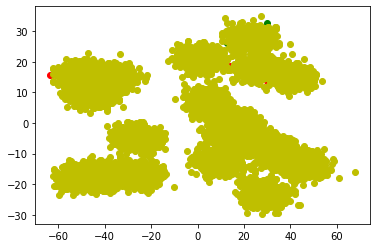

In [34]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

#สีจริง คำตอบที่แท้จริง แบบธรรมดาทำ PCA กี่รอบก็ได้เท่าเดิม เพราะมองในมุมองที่ data กระจายดีที่สุด
#สีเหลืองกระจายและทับสีอื่นไปหมด



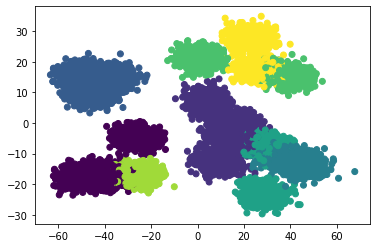

In [18]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

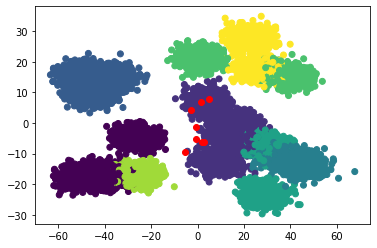

In [19]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

### Elbow method

-elbow method จะ plot กราฟคล้ายๆศอก

-SSE วัดระยะห่างของ center ทุกๆจุดว่าห่างกันเท่าไหร่ จากนั้นเอามา sum รวมกัน

-ใกล้กับ center มากยิ่งดี

In [20]:
kmeans.inertia_  #หาค่า SSE (Sum of Squared Errors) #ไม่ต้องหาใหม่เลยเนื่องจาก kmeans หามาไว้ให้เเล้ว

6439989.808714021

SSE (Sum of Squared Errors)

In [21]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)
     #วนลูปเพื่อจะเปลี่ยน k จาก 1 เป็น2,3,4,5,6,7,8

In [22]:
SSE #ผลลัพธ์มีทั้งหมด 8 ตัว


[21350325.789858438,
 12393046.099239781,
 10776718.895710021,
 9738911.172012035,
 8879612.274629781,
 8063629.856036617,
 7364694.483401365,
 6439989.808714021]

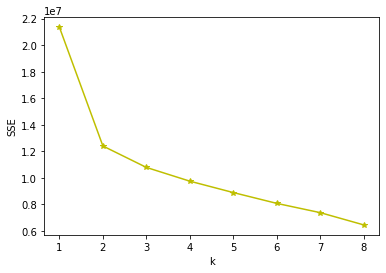

In [23]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'*-y')
plt.xlabel('k')
plt.ylabel('SSE');

#นำค่า SSE มา plot กราฟ
#elbow คือศอก  2 คือ ศอก

### silhouette coefficient (ซีลูอิท โคแอฟฟิเซียน)

1.How close the data point is to other points in the cluster คำนวณว่า data แต่ละอันที่อยู่ในกลุ่มเดียวกันมันอยู่ใกล้กับจุดอื่น ๆ ในคลัสเตอร์อย่างไร

2.How far away the data point is from points in other clusters จุดข้อมูลอยู่ห่างจากจุดในคลัสเตอร์อื่นแค่ไหน

In [24]:
from sklearn import metrics

In [25]:
SilH = list() #silhouette scores คิดข้อมูลที่มีกลุ่มเดียวไม่ได้
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

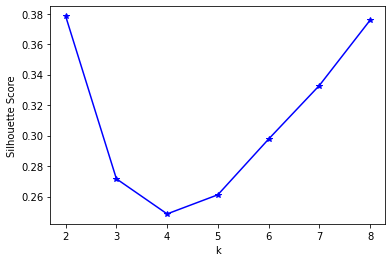

In [26]:
plt.plot([2,3,4,5,6,7,8],SilH,'*-b')
plt.xlabel('k')
plt.ylabel('Silhouette Score');
 #ดูกราฟจากจุด silhouette scores ที่สูงที่สุด มีค่ามากแสดงว่าใกล้กันมาก มีค่าตั้งแต่-1ถึง 1  #ดีที่สุดคือ 2 เพราะสูงสุด

3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

ทำ MDS

MDSจะพยายาม plot graph ใหม่ให้ dimensions ลดลงแต่จะพยายามรักษาระยะห่าง จุดไหนใกล้กับจุดไหนมาก จุดไหนใกล้กับจุดไหนน้อย

In [35]:
from sklearn.manifold import MDS

In [36]:
mds = MDS(n_components=2) #กำหนดให้ components = 2

In [37]:
New_mds = mds.fit_transform(Data) #คำนวณระยะห่างระหว่างจุด

K-mean

In [38]:
kmeans2 = KMeans(n_clusters=8,random_state=2021)  #ให้ k= 8   ตามที่หาไว้
kmeans2.fit(Data)
g = kmeans2.predict(Data)

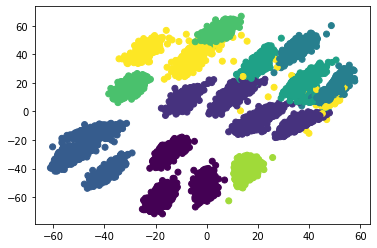

In [39]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y)

4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

กราฟของข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

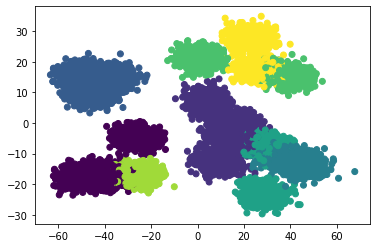

In [40]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

กราฟของข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ



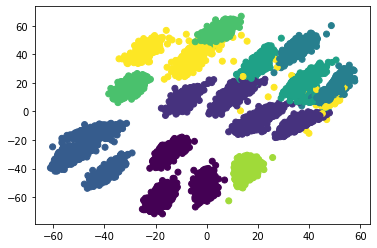

In [41]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y)

จากการเปรียบเทียบข้อ 2 กับ ข้อ 3 จะเห็นได้ชัดว่าถ้าเราลด dimension แล้วค่อยทำ clustering จะเห็นว่ากราฟข้อ 3 มีการกระจายข้อมูลที่เปลี่ยนไป และลักษณะการกระจายข้อมูลดูเล็กลง เพราะ dimension ลดลง และระยะห่างยังคงเดิม แต่ข้อ 2 การกระจายของข้อมูลมีขนาดใหญ่ และอยู่กันเป็นกลุ่ม 